In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import spacy
import random

In [2]:
data = pd.read_csv('../data/raw_questions.csv')
with open('../data/parsed_answers.pkl', 'rb') as f:
    answers = pickle.load(f)

### Distribution of Answer Lengths

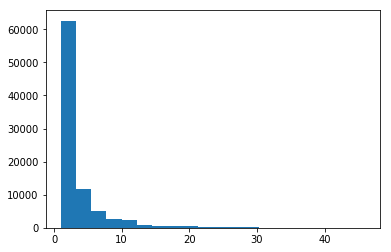

(0.31761778102489757, 0.7142889759015514)

In [3]:
lengths = []
for ans in answers:
    lengths.append(len(ans))
plt.hist(lengths, bins=20)
plt.show()

n = len(lengths)
lengths = np.array(lengths)
((lengths == 1).sum()/n, (lengths <= 3).sum()/n)

Unsurprisingly, answer lengths follow power-law distribution. 31% of answers are just one word, 71% of answers are 3 words or less.

### PoS Tags per Answer

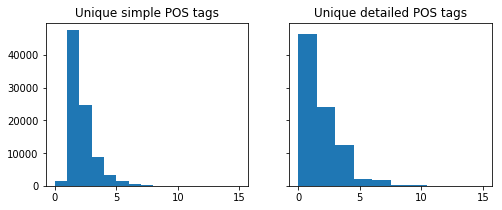

In [4]:
n_POS = []  # number of unique simple POS tags per answer
n_tag = []  # number of unique detailed POS tags per answer
stop = set()
for ans in answers:
    POS, tag = set(), set()
    for token in ans:
        if token.is_stop:
            stop.add(token.text)
        else:
            POS.add(token.pos_)
            tag.add(token.tag_)
    n_POS.append(len(POS))
    n_tag.append(len(tag))
    
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 3))
axes[0].hist(n_POS, bins=10)
axes[0].set_title('Unique simple POS tags')
axes[1].hist(n_tag, bins=10)
axes[1].set_title('Unique detailed POS tags')
plt.show()

In [8]:
print((np.array(n_POS) == 1).sum())
print((np.array(n_tag) == 1).sum())

47451
45131


When excluding stop words, more than half the questions have only one unique POS tag - for these questions hopefully we can infer the required type of the answer from the question.

### Named entity recognition

In [6]:
entities = set()
for ans in answers:
    for ent in ans.ents:
        entities.add(ent)
entities = np.array(list(entities))
        
labels = []
for ent in entities:
    labels.append(ent.label_)
labels = np.array(labels)

In [9]:
for label in set(labels):
    ents = entities[np.where(labels == label)[0]]
    print('{}: {}'.format(label, spacy.explain(label)))
    for ent in ents[:5]:
        print(ent.text)
    print()

MONEY: Monetary values, including unit
$350 million
£160 million
186,000
€752 million
$2 billion

NORP: Nationalities or religious or political groups
Malayo-Polynesian
Albanian
Italians
Byzantine
Australians

ORDINAL: "first", "second", etc.
second
first
19th
11th
second

TIME: Times smaller than a day
daylight hours
10 minutes
an hour
less than an hour
90 minutes

DATE: Absolute or relative dates or periods
February 2015
2013–14
31 May 1970
167 million years
1968

GPE: Countries, cities, states
Queensland
West Germany
Sweden
Scotland
Octavian

LAW: Named documents made into laws.
the Nigerian Baptist Convention
the Community Reinvestment Act
Constitution
the Warsaw Pact
the Slave Trade Act

ORG: Companies, agencies, institutions, etc.
Comboios de Portugal
Huns
State Security Service
Physicist
the School of Commerce and Finance

PRODUCT: Objects, vehicles, foods, etc. (not services)
Windows
PlayStation
Ramesses II
Windows 7 Home Basic
Windows 8.1

FAC: None
Independence Square
Golden 

Pretty good ¯\\_(ツ)_/¯